In [1]:
import matplotlib.pyplot as plt
import numpy as np
import flet as ft
import os
import base64
from pylsl import StreamInlet, resolve_stream
from scipy.signal import welch, spectrogram
import pyxdf
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

Authorization classes are not loaded, using fake implementations.


In [2]:
import pyxdf
import os
import numpy as np

def concat_data(frequency):
    # โฟลเดอร์ที่เก็บข้อมูล
    data_folder = f'../../../data_ssvep/Toey/SSVEP_data/{frequency}/'

    # เก็บข้อมูลจากทุกไฟล์ในโฟลเดอร์
    all_data = []
    for file_name in os.listdir(data_folder):
        file_path = os.path.join(data_folder, file_name)
        streams, _ = pyxdf.load_xdf(file_path)
        raw_data = streams[0]["time_series"].T
        all_data.append(raw_data)

    # แปลงเป็น NumPy array และรวมข้อมูลด้วย np.concatenate
    all_data_array = np.concatenate(all_data, axis=1)

    return all_data_array


In [3]:
raw_data1 = concat_data('6Hz')
print(raw_data1.shape)
raw_data2 = concat_data('20Hz')
print(raw_data2.shape)
raw_data3 = concat_data('0Hz')
print(raw_data3.shape)

(8, 159670)
(8, 177500)
(8, 152760)


In [4]:
# streams1, header = pyxdf.load_xdf('../../../data_ssvep/Toey/SSVEP_data/6Hz/6hz_1')
# raw_data1 = streams1[0]["time_series"].T #From Steam variable this query is EEG data
# print(raw_data1.shape)

# streams2, header = pyxdf.load_xdf('../../../data_ssvep/Toey/SSVEP_data/20Hz/20hz_1')
# raw_data2 = streams2[0]["time_series"].T #From Steam variable this query is EEG data

# streams3, header = pyxdf.load_xdf('../../../data_ssvep/Toey/SSVEP_data/0Hz/0hz_1')
# raw_data3 = streams3[0]["time_series"].T #From Steam variable this query is EEG data

In [5]:
data1 = raw_data1[0:4,:]
data2 = raw_data2[0:4,:]
data3 = raw_data3[0:4,:]

In [6]:
data1_oz = data1[0] - data1[1]
data1_o1 = data1[2] - data1[1]
data1_o2 = data1[3] - data1[1]
print(len(data1_o1))
data2_oz = data2[0] - data2[1]
data2_o1 = data2[2] - data2[1]
data2_o2 = data2[3] - data2[1]
print(len(data2_o1))
data3_oz = data3[0] - data3[1]
data3_o1 = data3[2] - data3[1]
data3_o2 = data3[3] - data3[1]
print(len(data3_o1))

159670
177500
152760


In [7]:
def create_overlapping_sets(data, set_size=500, overlap_fraction=0.5):
    step = int(set_size * (1 - overlap_fraction))
    sets = []
    for i in range(0, len(data) - set_size + 1, step):
        sets.append(data[i:i + set_size])
    return sets

In [8]:
data1_set_oz = create_overlapping_sets(data1_oz, set_size=1000, overlap_fraction=0.5)
data1_set_o1 = create_overlapping_sets(data1_o1, set_size=1000, overlap_fraction=0.5)
data1_set_o2 = create_overlapping_sets(data1_o2, set_size=1000, overlap_fraction=0.5)

In [9]:
data2_set_oz = create_overlapping_sets(data2_oz, set_size=1000, overlap_fraction=0.5)
data2_set_o1 = create_overlapping_sets(data2_o1, set_size=1000, overlap_fraction=0.5)
data2_set_o2 = create_overlapping_sets(data2_o2, set_size=1000, overlap_fraction=0.5)

In [10]:
data3_set_oz = create_overlapping_sets(data3_oz, set_size=1000, overlap_fraction=0.5)
data3_set_o1 = create_overlapping_sets(data3_o1, set_size=1000, overlap_fraction=0.5)
data3_set_o2 = create_overlapping_sets(data3_o2, set_size=1000, overlap_fraction=0.5)

In [11]:
print(len(data1_set_oz))
print(len(data2_set_oz))
print(len(data3_set_oz))


318
354
304


In [12]:
# f, Pxx = welch(data_oz, fs=250, nperseg= 250*4)

In [13]:
data1_fft_oz = []
data1_fft_o1 = []
data1_fft_o2 = []
for i in range(len(data1_set_oz)):
    f, Pxx = welch(data1_set_oz[i], fs=250, nperseg= 250*4)
    data1_fft_oz.append(Pxx[0:121])

    f, Pxx = welch(data1_set_o1[i], fs=250, nperseg= 250*4)
    data1_fft_o1.append(Pxx[0:121])

    f, Pxx = welch(data1_set_o2[i], fs=250, nperseg= 250*4)
    data1_fft_o2.append(Pxx[0:121])


In [14]:
print(f[0:121])

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.   10.25 10.5  10.75 11.   11.25 11.5  11.75
 12.   12.25 12.5  12.75 13.   13.25 13.5  13.75 14.   14.25 14.5  14.75
 15.   15.25 15.5  15.75 16.   16.25 16.5  16.75 17.   17.25 17.5  17.75
 18.   18.25 18.5  18.75 19.   19.25 19.5  19.75 20.   20.25 20.5  20.75
 21.   21.25 21.5  21.75 22.   22.25 22.5  22.75 23.   23.25 23.5  23.75
 24.   24.25 24.5  24.75 25.   25.25 25.5  25.75 26.   26.25 26.5  26.75
 27.   27.25 27.5  27.75 28.   28.25 28.5  28.75 29.   29.25 29.5  29.75
 30.  ]


In [15]:
data2_fft_oz = []
data2_fft_o1 = []
data2_fft_o2 = []
for i in range(len(data2_set_oz)):
    f, Pxx = welch(data2_set_oz[i], fs=250, nperseg= 250*4)
    data2_fft_oz.append(Pxx[0:121])

    f, Pxx = welch(data2_set_o1[i], fs=250, nperseg= 250*4)
    data2_fft_o1.append(Pxx[0:121])

    f, Pxx = welch(data2_set_o2[i], fs=250, nperseg= 250*4)
    data2_fft_o2.append(Pxx[0:121])

In [16]:
data3_fft_oz = []
data3_fft_o1 = []
data3_fft_o2 = []
for i in range(len(data3_set_oz)):
    f, Pxx = welch(data3_set_oz[i], fs=250, nperseg= 250*4)
    data3_fft_oz.append(Pxx[0:121])

    f, Pxx = welch(data3_set_o1[i], fs=250, nperseg= 250*4)
    data3_fft_o1.append(Pxx[0:121])

    f, Pxx = welch(data3_set_o2[i], fs=250, nperseg= 250*4)
    data3_fft_o2.append(Pxx[0:121])

In [17]:
Pxx

array([5.62101212e+01, 2.07679834e+03, 1.45559973e+03, 1.81169281e+02,
       1.30902512e+02, 3.03563721e+02, 4.70408020e+02, 8.12272263e+01,
       6.59503021e+01, 2.01141037e+02, 1.50659515e+02, 4.72148193e+02,
       4.84287109e+02, 5.43402466e+02, 4.18605896e+02, 2.64216980e+02,
       5.65718498e+01, 1.49185257e+01, 1.93326935e+02, 9.93174210e+01,
       1.12788712e+02, 6.20907837e+02, 1.36915665e+02, 1.70751877e+02,
       1.60571945e+02, 1.35247192e+02, 1.46895035e+02, 2.77591766e+02,
       4.64770844e+02, 3.36785950e+02, 2.69532471e+02, 2.44391083e+02,
       1.47389740e+02, 5.81184044e+01, 7.22014809e+00, 4.08149624e+00,
       6.79062424e+01, 6.67478409e+01, 1.02844231e+02, 1.85741394e+02,
       1.70045273e+02, 7.50744934e+01, 5.12585402e+00, 7.63814449e+00,
       7.93225574e+00, 4.32528763e+01, 1.33898346e+02, 1.85801849e+01,
       1.13371422e+02, 2.82942902e+02, 5.17305542e+02, 2.18609619e+02,
       1.31584156e+00, 6.46750565e+01, 2.58129711e+01, 7.45492172e+01,
      

In [18]:
data3_fft_oz = np.array(data3_fft_oz)
data3_fft_o1 = np.array(data3_fft_o1)
data3_fft_o2 = np.array(data3_fft_o2)
print(data3_fft_o2.shape)

(304, 121)


c:\ProgramData\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



(976, 363)


C:\Users\Toey\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


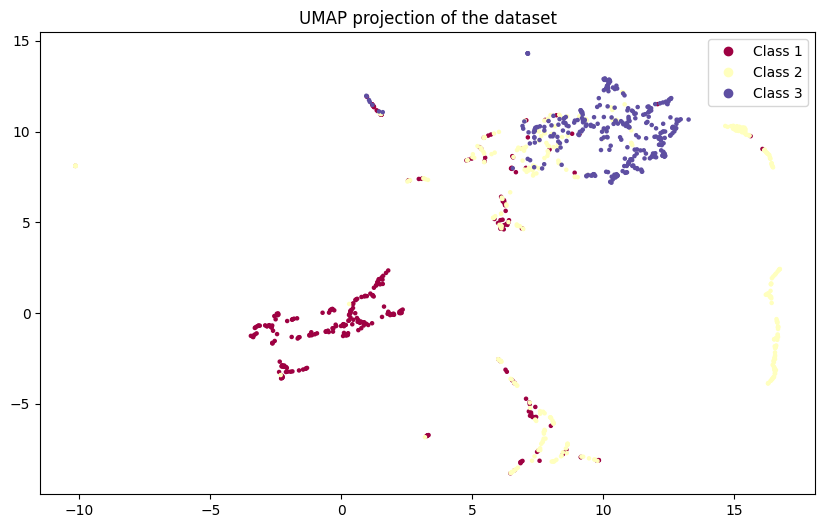

In [19]:
import umap
# รวมข้อมูลจากทุก feature สำหรับแต่ละ class และ flatten ข้อมูล
combined_data1 = np.hstack((data1_fft_oz, data1_fft_o1, data1_fft_o2))
combined_data2 = np.hstack((data2_fft_oz, data2_fft_o1, data2_fft_o2))
combined_data3 = np.hstack((data3_fft_oz, data3_fft_o1, data3_fft_o2))

# รวมข้อมูลจากทุก class เข้าด้วยกัน
combined_data = np.vstack((combined_data1, combined_data2, combined_data3))

# ตรวจสอบว่าข้อมูลมีขนาดที่ถูกต้อง
print(combined_data.shape)  # ควรได้ (จำนวน samples ทั้งหมด, จำนวน features)

# สร้าง label สำหรับแต่ละ class
labels = np.array([0]*len(data1_fft_oz) + [1]*len(data2_fft_oz) + [2]*len(data3_fft_oz))

# ทำ UMAP
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors = 5)
embedding = reducer.fit_transform(combined_data)

# แสดงผลการลดมิติ
plt.figure(figsize=(10, 6))
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='Spectral', s=5)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1', 'Class 2', 'Class 3'])
plt.title('UMAP projection of the dataset')
plt.show()

In [20]:
print(combined_data1.shape)
print(labels.shape)
print(embedding.shape)

(318, 363)
(976,)
(976, 2)


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# แบ่งข้อมูลเป็น train set และ test set
X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# ทำนายบน test set
y_pred_rf = rf_classifier.predict(X_test)

precision_lda_per_class = precision_score(y_test, y_pred_rf, average=None)
recall_lda_per_class = recall_score(y_test, y_pred_rf, average=None)
f1_lda_per_class = f1_score(y_test, y_pred_rf, average=None)

# คำนวณ accuracy ของแต่ละคลาส
accuracy_lda_per_class = []
for class_label in range(len(precision_lda_per_class)):
    correct_predictions = ((y_pred_rf == class_label) & (y_test == class_label)).sum()
    total_predictions = (y_pred_rf == class_label).sum()
    # print(y_pred_rf)
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    accuracy_lda_per_class.append(accuracy)

# คำนวณค่าเฉลี่ยของ accuracy
avg_accuracy_lda = accuracy_score(y_test, y_pred_rf)

# เฉลี่ย precision, recall, และ F1-score ของแต่ละคลาส
avg_precision_lda = precision_score(y_test, y_pred_rf, average='weighted')
avg_recall_lda = recall_score(y_test, y_pred_rf, average='weighted')
avg_f1_lda = f1_score(y_test, y_pred_rf, average='weighted')

# สร้าง DataFrame จากผลลัพธ์
results_df = pd.DataFrame({
    'Class': range(len(precision_lda_per_class)),
    'Precision': precision_lda_per_class,
    'Recall': recall_lda_per_class,
    'F1-score': f1_lda_per_class,
    'Accuracy': accuracy_lda_per_class
})

# เพิ่มค่าเฉลี่ยของ accuracy และ precision, recall, F1-score ลงในตาราง
results_df.loc['average'] = [None, avg_precision_lda, avg_recall_lda, avg_f1_lda, avg_accuracy_lda]

print(results_df)


         Class  Precision    Recall  F1-score  Accuracy
0          0.0   1.000000  0.983607  0.991736  1.000000
1          1.0   0.987179  1.000000  0.993548  0.987179
2          2.0   1.000000  1.000000  1.000000  1.000000
average    NaN   0.994963  0.994898  0.994893  0.994898


In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# แบ่งข้อมูลเป็น train set และ test set
X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล SVM 'poly' 'linear' 'rbf'
svm_classifier = SVC(C=0.1, gamma=1, kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# ทำนายบน test set
y_pred_svm = svm_classifier.predict(X_test)

# ประเมิน precision, recall, และ F1-score ของแต่ละคลาส
precision_lda_per_class = precision_score(y_test, y_pred_svm, average=None)
recall_lda_per_class = recall_score(y_test, y_pred_svm, average=None)
f1_lda_per_class = f1_score(y_test, y_pred_svm, average=None)

# คำนวณ accuracy ของแต่ละคลาส
accuracy_lda_per_class = []
for class_label in range(len(precision_lda_per_class)):
    correct_predictions = ((y_pred_svm == class_label) & (y_test == class_label)).sum()
    # print(y_test)
    total_predictions = (y_pred_svm == class_label).sum()
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    accuracy_lda_per_class.append(accuracy)

# คำนวณค่าเฉลี่ยของ accuracy
avg_accuracy_lda = accuracy_score(y_test, y_pred_svm)

# เฉลี่ย precision, recall, และ F1-score ของแต่ละคลาส
avg_precision_lda = precision_score(y_test, y_pred_svm, average='weighted')
avg_recall_lda = recall_score(y_test, y_pred_svm, average='weighted')
avg_f1_lda = f1_score(y_test, y_pred_svm, average='weighted')

# สร้าง DataFrame จากผลลัพธ์
results_df = pd.DataFrame({
    'Class': range(len(precision_lda_per_class)),
    'Precision': precision_lda_per_class,
    'Recall': recall_lda_per_class,
    'F1-score': f1_lda_per_class,
    'Accuracy': accuracy_lda_per_class
})

# เพิ่มค่าเฉลี่ยของ accuracy และ precision, recall, F1-score ลงในตาราง
results_df.loc['average'] = [None, avg_precision_lda, avg_recall_lda, avg_f1_lda, avg_accuracy_lda]

print(results_df)


         Class  Precision    Recall  F1-score  Accuracy
0          0.0   0.800000  0.852459  0.825397  0.800000
1          1.0   0.863014  0.818182  0.840000  0.863014
2          2.0   0.982759  0.982759  0.982759  0.982759
average    NaN   0.878837  0.877551  0.877700  0.877551


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# แบ่งข้อมูลเป็น train set และ test set
X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.2, random_state=42)

# กำหนดช่วงของ hyperparameters ที่ต้องการทดสอบ
param_grid = {
    'C': [0.1, 1, 10, 100],  # regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # kernel coefficient
    'kernel': ['rbf', 'linear', 'poly']  # kernel function
}

# สร้าง GridSearchCV object
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

# ฝึกโมเดล
grid_search.fit(X_train, y_train)

# แสดง hyperparameters ที่ดีที่สุด
print("Best hyperparameters:", grid_search.best_params_)

# ทำนายบน test set
y_pred_svm = grid_search.best_estimator_.predict(X_test)

# ประเมินประสิทธิภาพของโมเดล SVM ที่ปรับ hyperparameters แล้ว
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


C:\Users\Toey\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Toey\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Toey\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Toey\AppData\Roaming\Python\Python311\site-pack

Best hyperparameters: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVM Accuracy: 0.8775510204081632


In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# แบ่งข้อมูลเป็น train set และ test set
X_train, X_test, y_train, y_test = train_test_split(combined_data, labels, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล LDA
lda_classifier = LinearDiscriminantAnalysis()
lda_classifier.fit(X_train, y_train)

# ทำนายบน test set
y_pred_lda = lda_classifier.predict(X_test)

# ประเมิน precision, recall, และ F1-score ของแต่ละคลาส
precision_lda_per_class = precision_score(y_test, y_pred_lda, average=None)
recall_lda_per_class = recall_score(y_test, y_pred_lda, average=None)
f1_lda_per_class = f1_score(y_test, y_pred_lda, average=None)

# คำนวณ accuracy ของแต่ละคลาส
accuracy_lda_per_class = []
for class_label in range(len(precision_lda_per_class)):
    correct_predictions = ((y_pred_lda == class_label) & (y_test == class_label)).sum()
    total_predictions = (y_pred_lda == class_label).sum()
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    accuracy_lda_per_class.append(accuracy)

# คำนวณค่าเฉลี่ยของ accuracy
avg_accuracy_lda = accuracy_score(y_test, y_pred_lda)

# เฉลี่ย precision, recall, และ F1-score ของแต่ละคลาส
avg_precision_lda = precision_score(y_test, y_pred_lda, average='weighted')
avg_recall_lda = recall_score(y_test, y_pred_lda, average='weighted')
avg_f1_lda = f1_score(y_test, y_pred_lda, average='weighted')

# สร้าง DataFrame จากผลลัพธ์
results_df = pd.DataFrame({
    'Class': range(len(precision_lda_per_class)),
    'Precision': precision_lda_per_class,
    'Recall': recall_lda_per_class,
    'F1-score': f1_lda_per_class,
    'Accuracy': accuracy_lda_per_class
})

# เพิ่มค่าเฉลี่ยของ accuracy และ precision, recall, F1-score ลงในตาราง
results_df.loc['average'] = [None, avg_precision_lda, avg_recall_lda, avg_f1_lda, avg_accuracy_lda]

print(results_df)

         Class  Precision    Recall  F1-score  Accuracy
0          0.0   1.000000  0.967213  0.983333  1.000000
1          1.0   0.986301  0.935065  0.960000  0.986301
2          2.0   0.906250  1.000000  0.950820  0.906250
average    NaN   0.966876  0.964286  0.964545  0.964286
